# Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Yesterday's COVID-19 Data

In [13]:
import datetime

date = datetime.date.today()-datetime.timedelta(days=365)
date = date.strftime("%m-%d-%Y")
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv'.format(date)
df = pd.read_csv(path)

# Data Pre-processing

In [14]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head(10)

,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,41975,6031.0,34446,1554
1,Albania,23705,11146.0,12002,557
2,Algeria,61381,17562.0,41783,2036
3,Andorra,5319,1201.0,4043,75
4,Angola,12335,6385.0,5647,303
5,Antigua and Barbuda,131,6.0,122,3
6,Argentina,1236851,150190.0,1053313,33348
7,Armenia,104249,39458.0,63258,1533
8,Australia,27658,1300.0,22295,907
9,Austria,147220,57570.0,88273,1377


# Total Confirmed vs Deaths

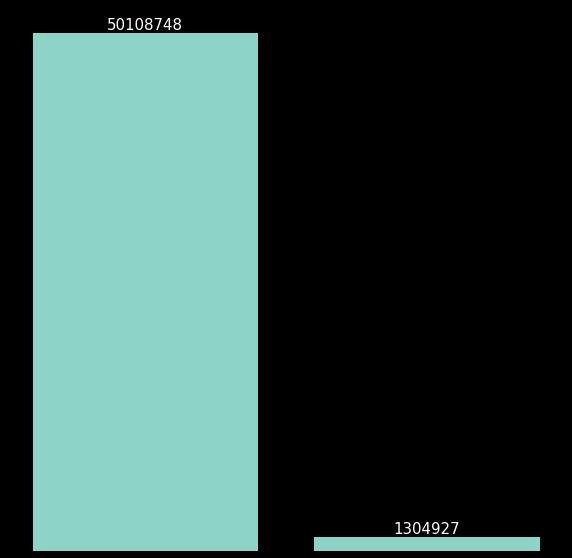

In [15]:
n = ["Total Confirmed", "Total Deaths" ]
s = [world["Confirmed"].sum() ,world["Deaths"].sum()]
plt.figure(figsize=(10,10))
plt.axis('off')
line = plt.bar(n,s)
plt.ylabel("Cases")

for i in range(len(s)):
    plt.annotate(str(s[i]), xy=(n[i],s[i]), ha='center', va='bottom')

plt.show()

# Top 20 Counties w/ Confirmed Cases

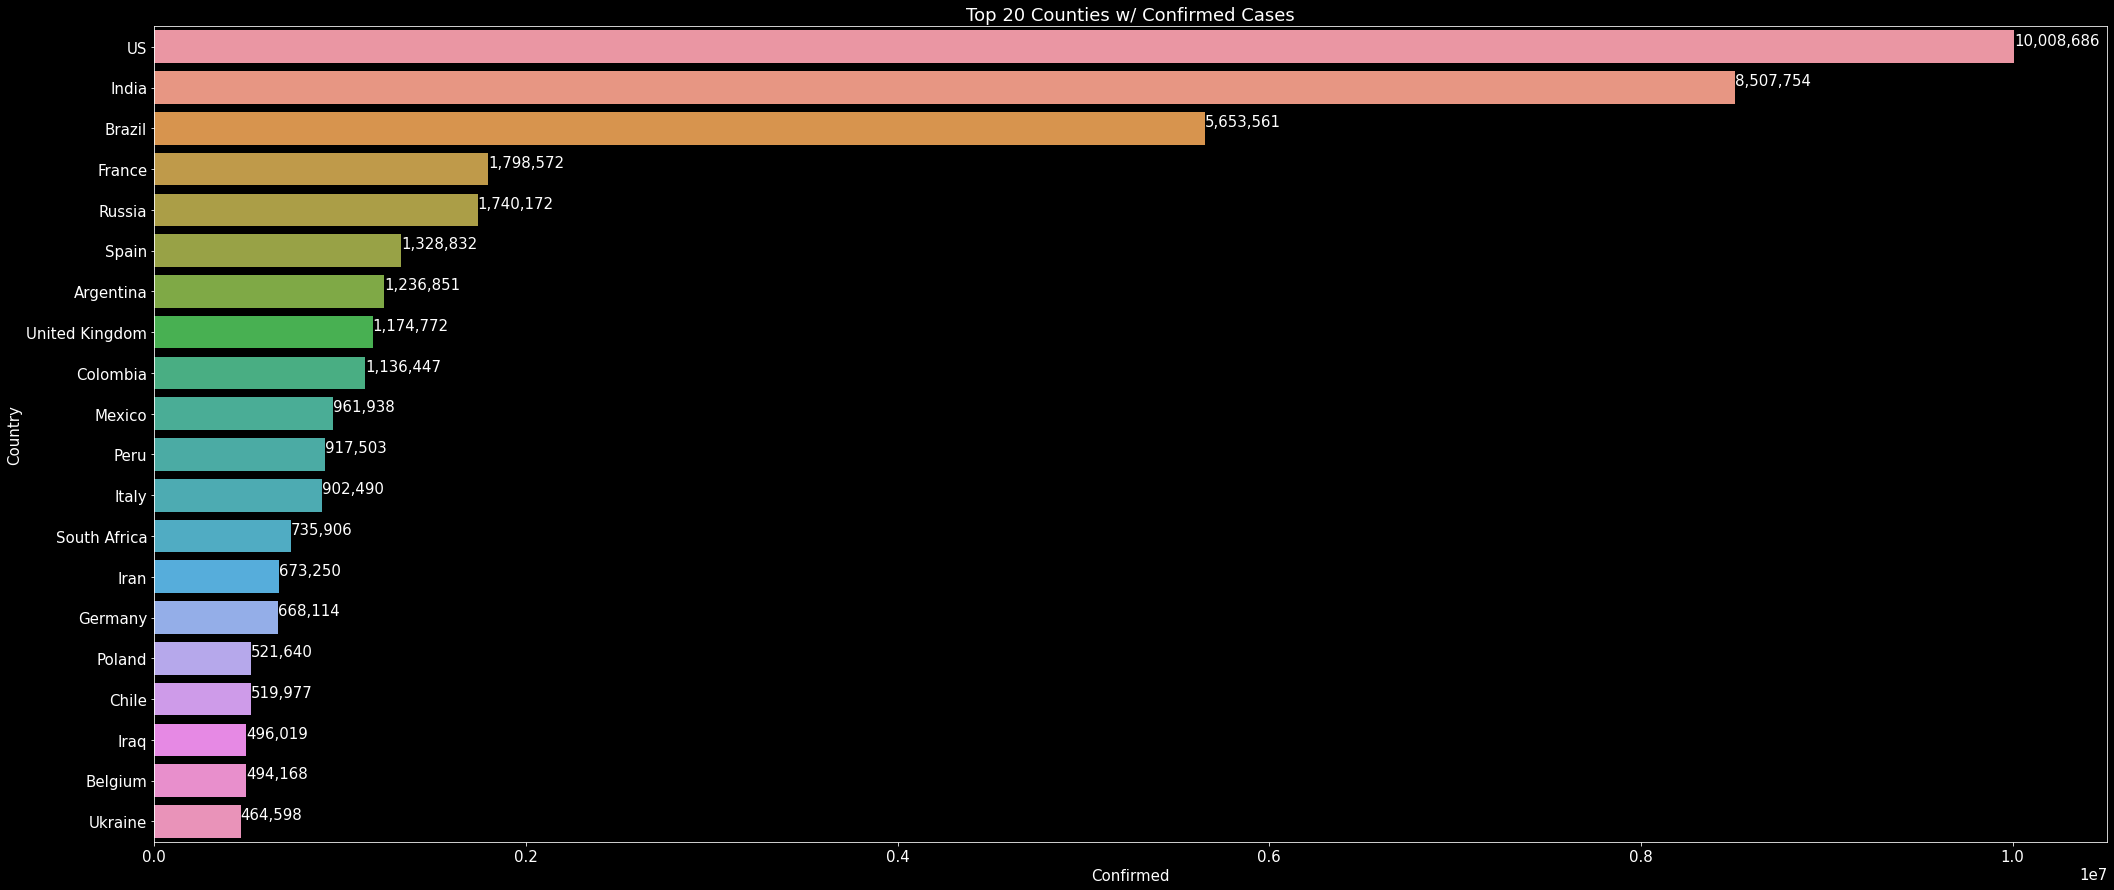

In [16]:
### Find top 20 countries with maximum number of confirmed cases
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)

### Generate a Barplot
plt.style.use('dark_background')
plt.figure(figsize=(35,15))
plt.title("Top 20 Counties w/ Confirmed Cases")
plot = sns.barplot(top_20['Confirmed'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=15)
plt.show()


# Top 20 Counties w/ Death Cases

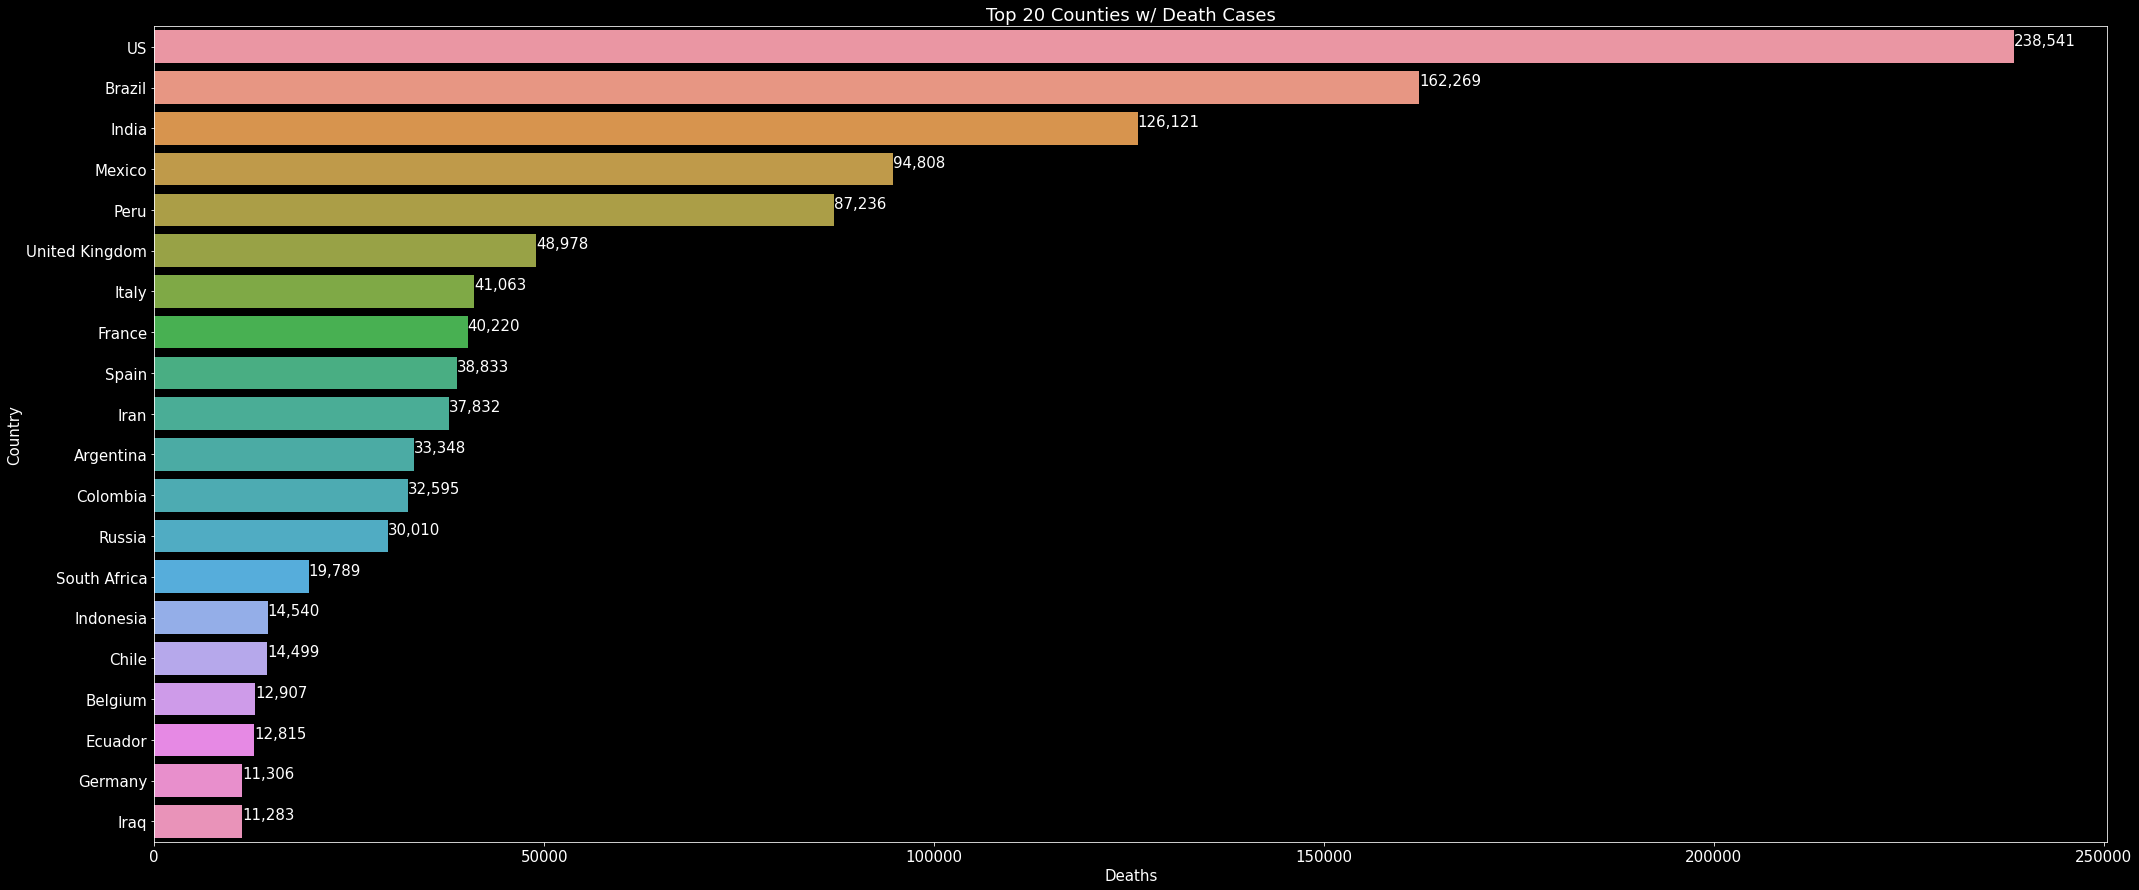

In [17]:
### Find top 20 countries with maximum number of confirmed cases
top_20 = world.sort_values(by=['Deaths'], ascending=False).head(20)

### Generate a Barplot
plt.figure(figsize=(35,15))
plt.title("Top 20 Counties w/ Death Cases")
plot = sns.barplot(top_20['Deaths'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Deaths'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=15)
plt.show()

# Top 10 Countries w/ Confirmed and Death Cases

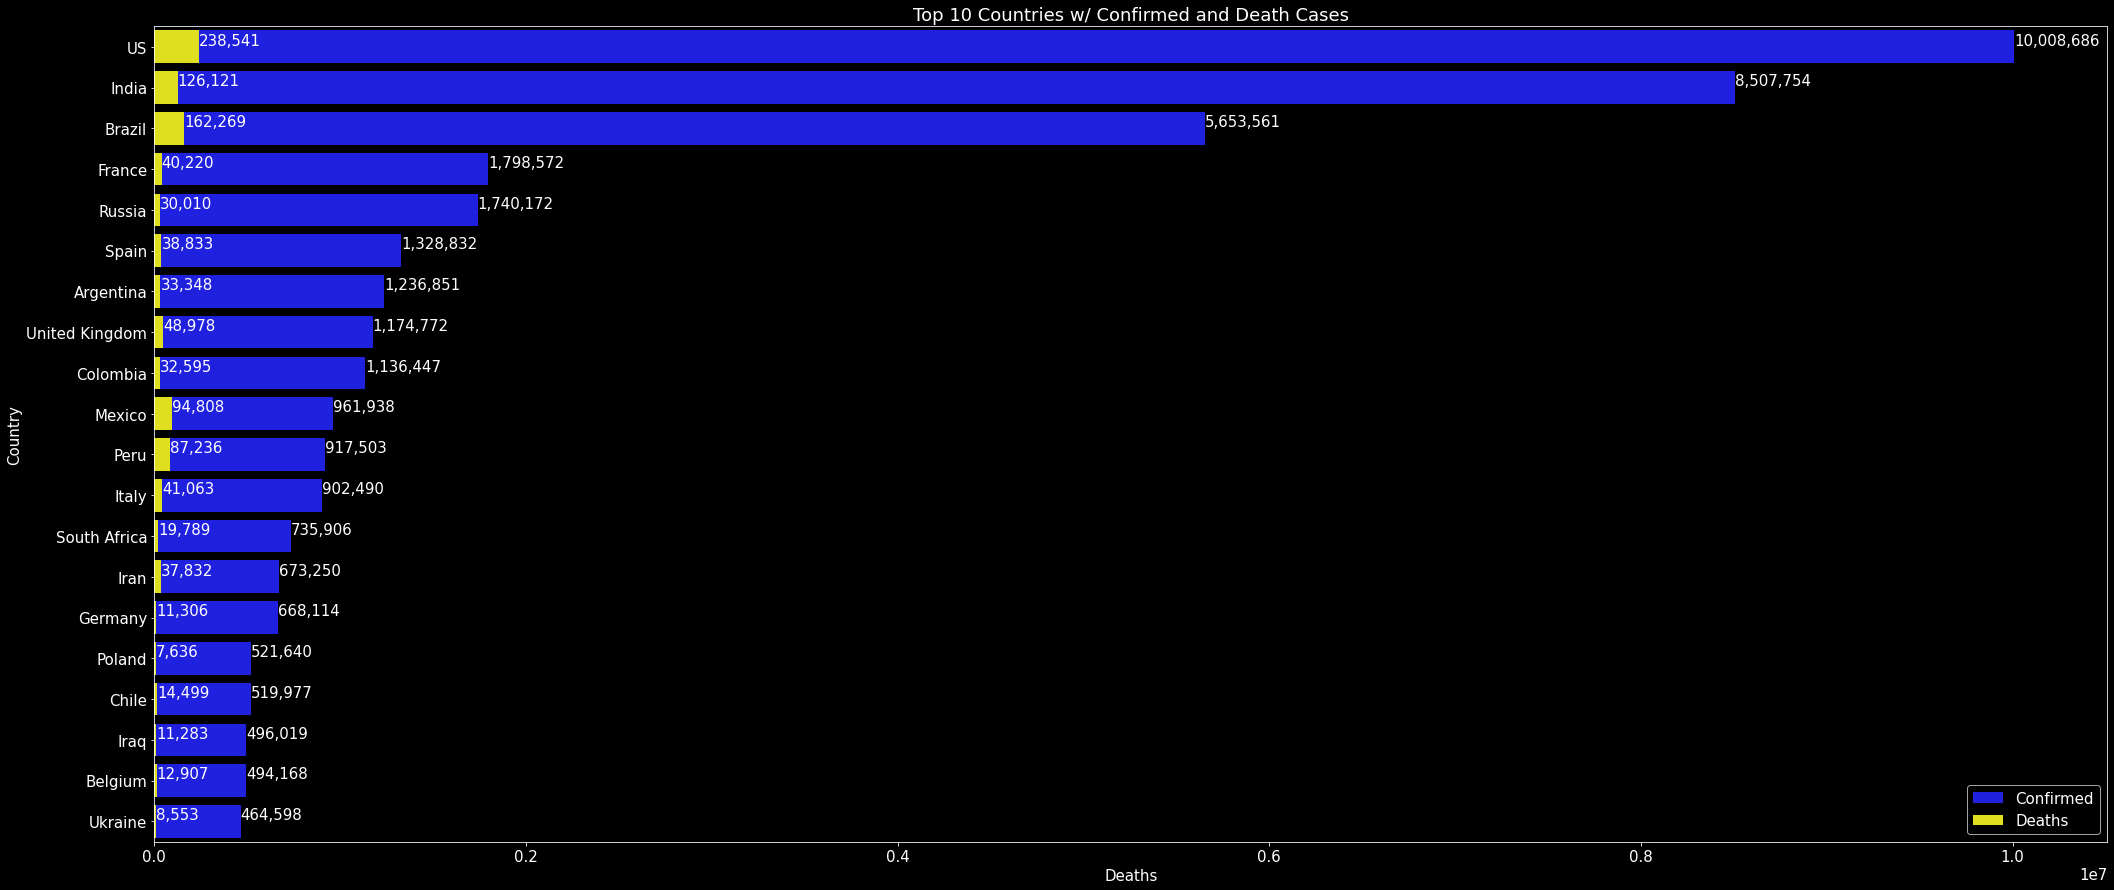

In [18]:
top_10 = world.sort_values(by=['Confirmed'], ascending=False).head(20)

### Generate a Barplot
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(35,15))
plt.title("Top 10 Countries w/ Confirmed and Death Cases")
confirmed = sns.barplot(top_10['Confirmed'], top_10['Country'], color = 'blue', label='Confirmed')
recovered = sns.barplot(top_10['Deaths'], top_10['Country'], color = 'yellow', label='Deaths')

### Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_10['Confirmed'],top_10['Country'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}')
for i,(value,name) in enumerate(zip(top_10['Deaths'],top_10['Country'])):
    recovered.text(value,i-0.05,f'{value:,.0f}')
plt.legend(loc=4)
plt.show()

# Interactive Scatter Map w/ Confirmed and Death Cases

In [19]:
data = world.drop(["Active", "Recovered"], axis=1)
fig = px.scatter(data, x="Confirmed", y="Deaths", hover_data=["Country"], color="Confirmed", title="Interactive Scatter Map w/ Confirmed and Death Cases", template="plotly_dark")
fig.show()

# Interactive Choropleth Map w/ Confirmed Cases

In [20]:
figure = px.choropleth(world,locations="Country", locationmode="country names", color="Confirmed", hover_name="Country",title="Interactive Choropleth Map w/ Confirmed Cases", template='plotly_dark', )
figure.update_layout(margin=dict(l=10, r=10, t=35, b=10))
figure.show()